# Bay Wheels Bike Sharing System Usage Pattern
## by Adrian Alvizuri

## Investigation Overview

> Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area
## Dataset Overview

> The original combined data contains approximately 1,860,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:trip duration, station information and support variables which where added to help the analysis.
The following features will help to support my investigation: trip's start date/time and duration information and demographics like user type, gender and age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bt_18 = pd.read_csv('fordgobike_trips_2018_II.csv')

## User types

> Subscribers takes more rides than costumers (89% vs 11%). 

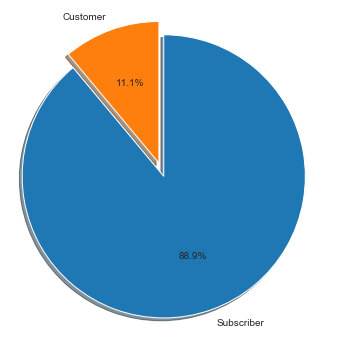

In [5]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df_bt_18.user_type.value_counts()/df_bt_18.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

## Monthly usage

> Both user types tend to ride more during the summer.

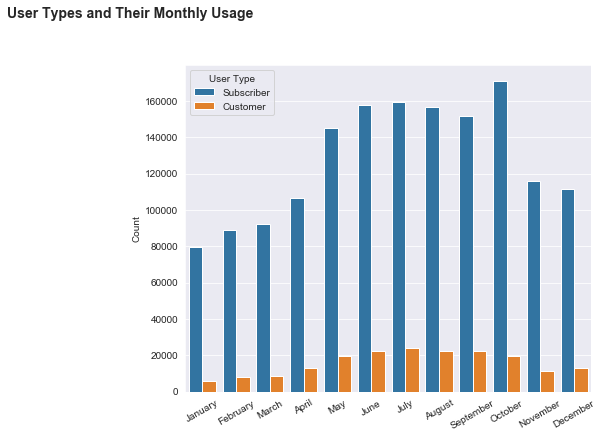

In [6]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df_bt_18, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

## Customers and Subscribers Weekday Trip Duration 

> In general, we can see that subscribers take shorter trips than customers.The trips taken by customers and subs increase on weekends. 

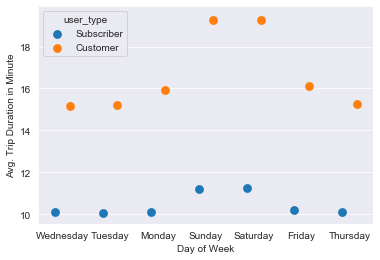

In [7]:
sb.pointplot(data=df_bt_18, x='start_dayofweek', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle